# 200 RQ2 Results


This notebooke outlines some of our key findings  for Research Question 2.

## RQ2. What effect does local competition have on businesses?
- Can we create profiles for areas summarizing their commercial characteristics? 
- Are businesses clustered by rating?
- Does competition effect Closure Rate of businesses?
- What impact do chain franchises have on their area?

### input;
'ZIPprofiles.pkl'

### notes;
- Businesses are rated on a scale from 1-5 stars.

## Setup

In [1]:
import os
import sys
import pandas as pd
from sklearn import datasets, linear_model
import math
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%matplotlib inline

Let's define our plot defaults.

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, linees, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 14

Now we'll load our business and state profiles.

In [3]:
ZIPdf = pd.read_pickle('../../data/analysis/ZIPprofiles.pkl')
STATEdf = pd.read_pickle('../../data/analysis/stateProfiles.pkl')

## Can we create profiles for areas summarizing their commercial characteristics?
<p>We succeeded in doing so, and in the following questions use ZIP code profiles to answer our other questions. We also created state profiles in our research which provide a means of viewing their commercial characteristics.</p>
<p>Below we have a graph which is an example of how these state profiles can be used to represent different characteristics of states.</p>

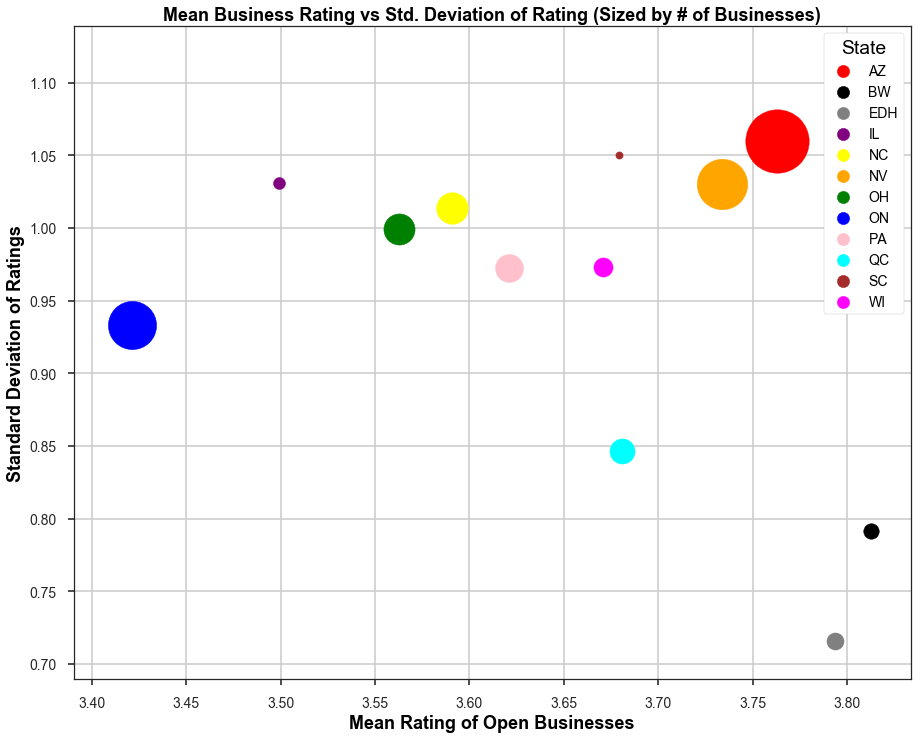

In [4]:
colorDict = {'AZ':'red','NV':'orange','NC':'yellow','SC':'brown','OH':'green',\
            'PA':'pink','QC':'cyan','ON':'blue','WI':'magenta','EDH':'grey',\
            'BW':'black','IL':'purple'}
fig, ax = plt.subplots()
#colours by the defined state in the dictionary, otherwise defaults to black

for state,group in STATEdf.groupby('state'):
    group.plot.scatter(figsize = (14,10),ax=ax, x='open_rating', y='std.dev_rating',\
                       label=state, color = colorDict[state], s = group['num_businesses']/13)

    
    
    # Legend for State colours
lgd = ax.legend(loc=0, frameon=True, framealpha=1, title="State")
for handle in lgd.legendHandles:
    handle.set_sizes([150])
    
ax.set_title("Mean Business Rating vs Std. Deviation of Rating (Sized by # of Businesses)")
ax.set_xlabel("Mean Rating of Open Businesses")
ax.set_ylabel("Standard Deviation of Ratings")
fig.set_size_inches(15,12)

The above graph is comparing the Mean Rating of Open Businesses in states to the Standard Deviation of Ratings (An indicator of how similarly rated businesses in an 

## Are businesses clustered by rating?

We use Standard Deviation as a measure of businesses clustering by rating. A lower Standard Deviation means high levels of clustering. 

Below we see that the ranges that standard deviation of ratings in an area most often fall into are, 0.75-1.00 and 1.25. A standard deviation below 1 begins to show a level of clustering (68% of businesses fall within a range of less than 2 stars.) Clearly there's a larger proportion of areas that show some level of clustering. But there's still a considerable amount of areas which don't show clustering.

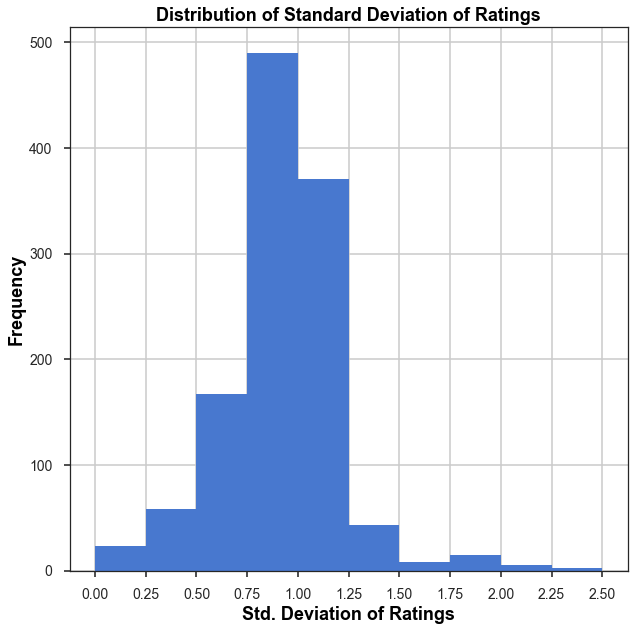

In [23]:
plot = ZIPdf.plot(kind = 'hist', y = 'std.dev_rating', bins = np.linspace(0,2.5,11), figsize = (10,10), legend = False)
plot.set_xlabel("Std. Deviation of Ratings")
plot.set_xticks(np.linspace(0,2.5,11))
plot.set_title("Distribution of Standard Deviation of Ratings")
fig = plot.get_figure()
fig.savefig('../../data/final/StdDev_Ratings_Distribution.png')

Below we compare Standard Deviation of Ratings with the Mean Rating of Open Businesses in areas. 
<p>It seems to be the case that areas of higher mean rating have lower levels of Standard Deviation (i.e. higher levels of clustering.)</p>

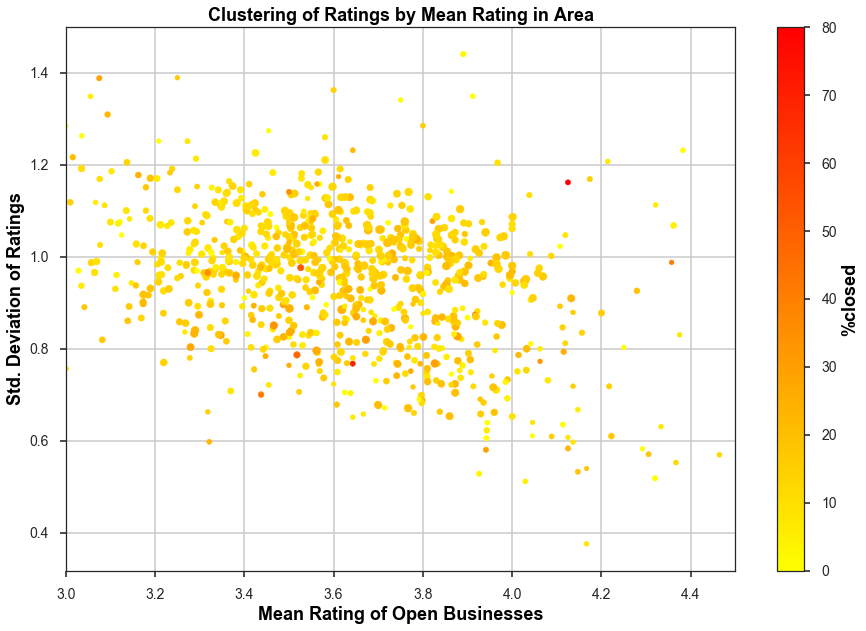

In [30]:
myMask = ZIPdf['num_businesses'] > 10

plot = ZIPdf[myMask].plot(kind = 'scatter',x = 'open_rating', y = 'std.dev_rating',c = "%closed",\
                        colormap = 'autumn_r', s = ZIPdf[myMask].num_businesses.apply(lambda x : 10*math.log(x, 3)),\
                        figsize = (15,10), xlim = (3.0,4.5), sharex = False)

plot.set_xlabel("Mean Rating of Open Businesses")
plot.set_ylabel("Std. Deviation of Ratings")
plot.set_title("Clustering of Ratings by Mean Rating in Area")

fig = plot.get_figure()
fig.savefig('../../data/final/ClusteringofRatings_by_MeanRating')

### Conclusions
More than half of areas show some level of clustering by rating, however there are still plenty that do not.
<p>Areas with a higher mean rating for open businesses tend to have higher levels of clustering by rating.</p>

## Does competition effect Closure Rate of businesses?

First we investigate the effects of an area having a large population of businesses.
<p>Below, we can see that there appears to be a positive correlation between the mean number of Business Yelp Interactions (Check-ins, Reviews, Tips) and the number of businesses in an area. So areas with more businesses have more interactions per business on average.</p>

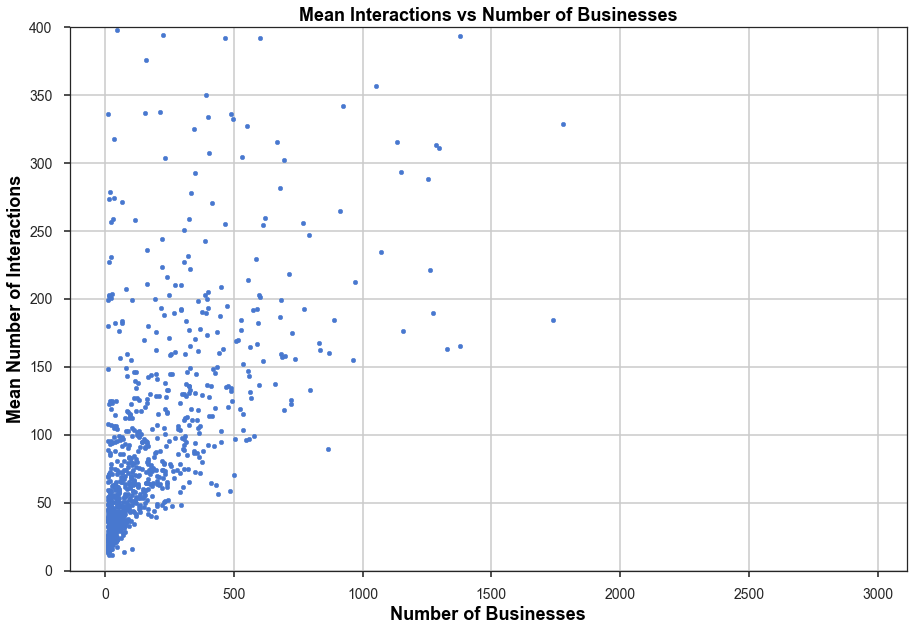

In [25]:
myMask = (ZIPdf['num_businesses'] > 10)
plot = ZIPdf[myMask].plot(kind = 'scatter', y = 'num_interactions', x = 'num_businesses', figsize = (15,10),\
                                    ylim = (0,400))
plot.set_title("Mean Interactions vs Number of Businesses")
plot.set_ylabel("Mean Number of Interactions")
plot.set_xlabel("Number of Businesses")
fig = plot.get_figure()
fig.savefig('../../data/final/MeanInteractions_vs_NumBusinesses.png')

Below we also compare the Number of Businesses in an area, and the % of them which are closed. Once again we find a positive relationship between the two.
<p>It appears that being in an area of higher business population has increased perfrmance benefits in terms of Yelp Interactions. However it also carries with it an added risk of closure.</p> 

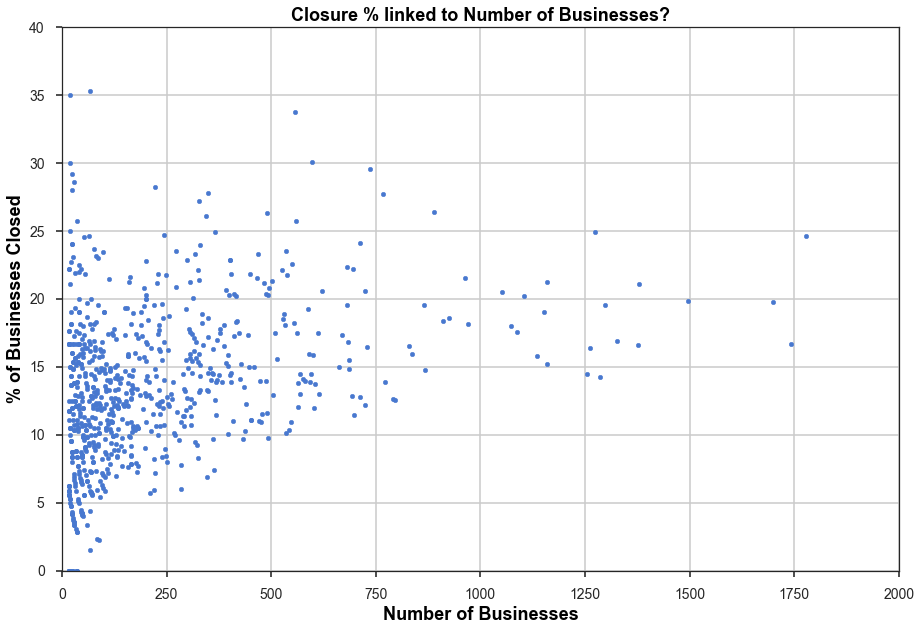

In [26]:
zipMask = (ZIPdf['num_businesses'] > 15)

plot = ZIPdf[zipMask].plot(kind = 'scatter', x = 'num_businesses', y = '%closed', figsize = (15,10),\
                           xlim = (0, 2000), ylim = (0,40))
plot.set_title("Closure % linked to Number of Businesses?")
plot.set_ylabel("% of Businesses Closed")
plot.set_xlabel("Number of Businesses")

fig = plot.get_figure()
fig.savefig('../../data/final/Closed%_vs_NumBusinesses.png')

Below we compare the Rating of Open and Closed businesses across all our areas. What we're investigating here is how your rating compared to your neighbours influences your risk of closure. <p>We see below that for areas with a mean closed rating below 3.25, there's a significant difference between th e ratings of closed and open businesses. However, this trend begins to reverse after a Mean Closed Rating of 3.5 and having a lower rating than your neighbour stops being an indicator of whether you will close.</p>

<p>Larger businesses appear to buck the trend, and fall closer to a 1:1 relationship between closed and open ratings.</p>

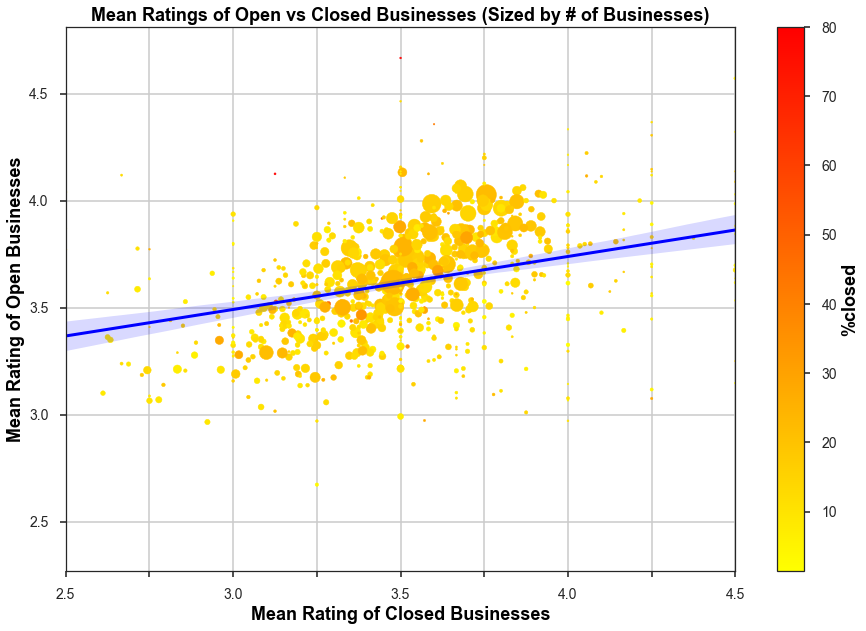

In [31]:
avgRatingMask = (ZIPdf['num_businesses'] > 10)
plot = ZIPdf[avgRatingMask].plot(kind = 'scatter', x = 'closed_rating', y = 'open_rating', sharex = False,\
         xlim = (2.5,4.5), s = ZIPdf[avgRatingMask].num_businesses/5, c = "%closed", colormap = 'autumn_r',\
                                    figsize = (15,10))
sns.regplot(ZIPdf[avgRatingMask]['closed_rating'],ZIPdf[avgRatingMask]['open_rating'], scatter = False, color = 'blue')
plot.set_title("Mean Ratings of Open vs Closed Businesses (Sized by # of Businesses)")
plot.set_xlabel("Mean Rating of Closed Businesses")
plot.set_ylabel("Mean Rating of Open Businesses")
plot.set_xticklabels([2.5,"",3.0,"",3.5,"",4.0,"",4.5])

fig = plot.get_figure()
fig.savefig('../../data/final/OpenRating_vs_ClosedRating.png')

### Conclusions 
Areas with higher numbers of businesses tend to have a higher level of interactions per business, but also carry with them a higher risk of closure.
<p>For areas with lower mean ratings (Open and Closed) closed businesses tend to have a lower rating on average than their open neighbours.</p>

## What impact do chain franchises have on their area?

First we create a mask, we want to investigate areas that have any chains at all. We also will carry on studying businesses with more than 10 businesses.

In [10]:
chainMask = (ZIPdf['%chains'] > 0) &  (ZIPdf['num_businesses'] > 10)

Below we compare the percentage of businesses in area that are chains, with the Mean Rating of Open Businesses. We see that chain franchises are more prevalent in areas with lower numbers of businesses, at least in terms of their percentage of total businesses.

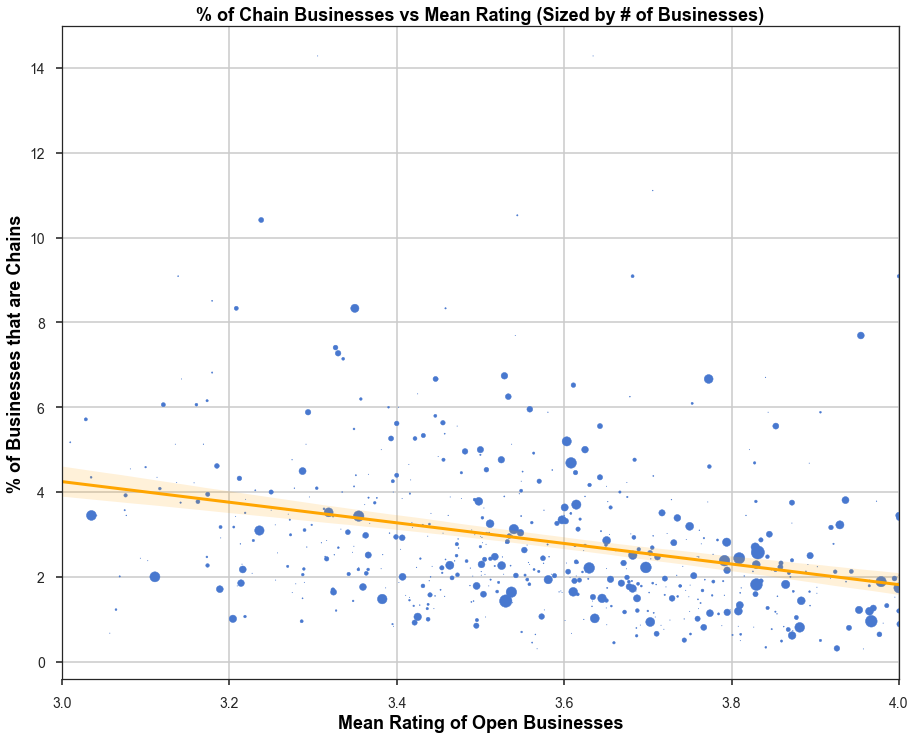

In [27]:
plot = ZIPdf[chainMask].plot(kind = 'scatter', x = 'open_rating', y = '%chains', figsize = (15,12), s = ZIPdf.num_businesses/5,\
                     xlim = (3.0,4.0))
sns.regplot(ZIPdf[chainMask]['open_rating'],ZIPdf[chainMask]['%chains'], scatter = False, color = 'orange')
plot.set_title("% of Chain Businesses vs Mean Rating (Sized by # of Businesses)")
plot.set_xlabel("Mean Rating of Open Businesses")
plot.set_ylabel("% of Businesses that are Chains")

fig = plot.get_figure()
fig.savefig('../../data/final/%Chains_vs_MeanRating.png')

Next, we compare the number of businesses in an area with the percentage of them that are chains. Observe that areas with less businesses appear to be more dominated by chain franchises.

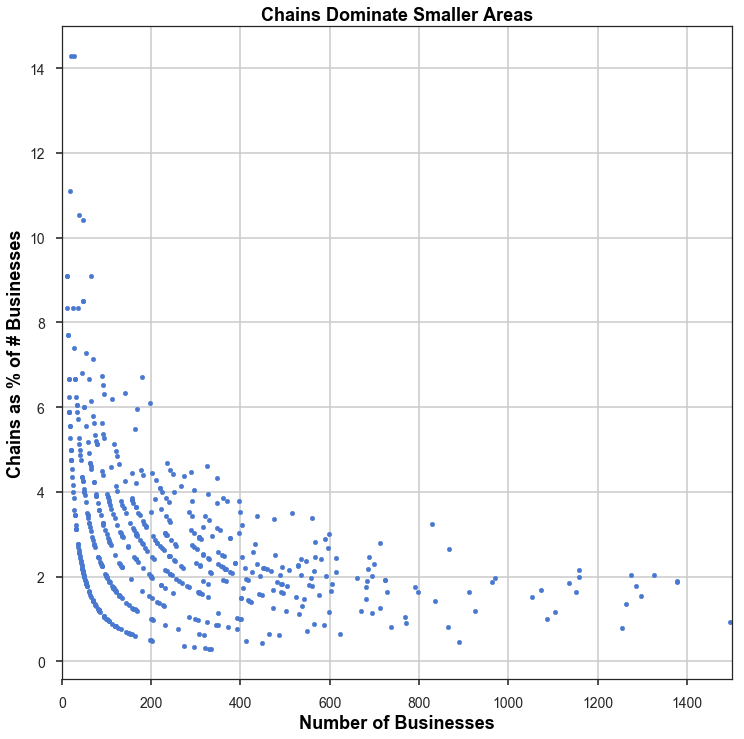

In [28]:
plot = ZIPdf[chainMask].plot(kind = 'scatter', x = 'num_businesses', y = '%chains', figsize = (12,12), xlim = (0,1500))
plot.set_title("Chains Dominate Smaller Areas")
plot.set_xlabel("Number of Businesses")
plot.set_ylabel("Chains as % of # Businesses")

fig = plot.get_figure()
fig.savefig('../../data/final/%Chains_vs_NumBusinesses.png')

### Conclusions
Chain Franchises appear to locate themselves in areas of low numbers of businesses and lower mean ratings.
This could be an artifact of the kind of areas that Chain Franchises decide to locate in, Chain Franchises put considerable thought into where to locate. However, it could also be a result of other businesses not wanting to locate near chain franchises or other unseen influences.

## Overall Conclusions
- Are businesses clustered by rating?
A lot of areas show some level of clustering, however there are a significant amount that do not. So this is not a consistent trend.
<p>Areas with higher mean ratings appear to display a greater tendency towards clustering by rating.</p>
- Does competition effect Closure Rate of businesses?
The number of businesses operating in your area seems to be linked to a higher rate of Yelp Interactions for each business. But this is a double-edged sword, it also is linked to a higher percentage of closed businesses.
<p>Having a lower rating than that of your neighbours is only linked to closures if the overall mean rating of businesses in the area are relatively low (less than ~3.25 stars).
- What impact do chain franchises have on their area?
<p>Chains make up a larger proportion of the business landscape in areas with a low number of businesses and lower mean rating for open businesses. It's unclear if this is due to these areas being chosen frequently to locate chain franchises in, or if these characteristics are a result of businesses responses to chains already being located there.</p>
<p>We also know that areas with lower numbers of businesses have a lower % of closed businesses. So it could be hypothesized that Chains locate there for this reason.</p>